In [32]:
import sqlite3 as sql 
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [31]:
conn = sql.connect('sales_data.db')

In [3]:
conn

In [4]:
pd.read_sql_query('select *from sqlite_master' , conn )

,type,name,tbl_name,rootpage,sql
0,table,customers,customers,2,CREATE TABLE customers (\n customer_id INTE...
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,products,products,4,CREATE TABLE products (\n product_id INTEGE...
3,table,sales,sales,5,CREATE TABLE sales (\n sale_id INTEGER PRIM...


In [5]:
pd.read_sql_query('select * from sales',conn)

,sale_id,customer_id,product_id,sale_date,quantity,total_sale
0,1,369,1,2022-08-31,5,5000.0
1,2,333,3,2023-03-15,2,600.0
2,3,298,7,2023-07-29,3,450.0
3,4,281,8,2020-03-23,1,80.0
4,5,374,8,2024-04-03,3,240.0
...,...,...,...,...,...,...
995,996,27,9,2022-08-26,2,200.0
996,997,61,6,2023-09-04,1,60.0
997,998,161,2,2025-05-17,5,2500.0
998,999,76,7,2020-03-20,2,300.0


In [6]:
def sql_query(sql):
    return pd.read_sql_query(sql,conn)

In [7]:
customer =sql_query('Select *from customers')
sqlite_squence =sql_query('Select *from sqlite_sequence')
products = sql_query('Select *from products')
sales = sql_query('Select *from sales')

In [8]:
sales

,sale_id,customer_id,product_id,sale_date,quantity,total_sale
0,1,369,1,2022-08-31,5,5000.0
1,2,333,3,2023-03-15,2,600.0
2,3,298,7,2023-07-29,3,450.0
3,4,281,8,2020-03-23,1,80.0
4,5,374,8,2024-04-03,3,240.0
...,...,...,...,...,...,...
995,996,27,9,2022-08-26,2,200.0
996,997,61,6,2023-09-04,1,60.0
997,998,161,2,2025-05-17,5,2500.0
998,999,76,7,2020-03-20,2,300.0


In [9]:
products

,product_id,product_name,category,price
0,1,Laptop,Electronics,1000.0
1,2,Phone,Electronics,500.0
2,3,Tablet,Electronics,300.0
3,4,Shirt,Apparel,20.0
4,5,Jeans,Apparel,40.0
5,6,Shoes,Apparel,60.0
6,7,Watch,Accessories,150.0
7,8,Bag,Accessories,80.0
8,9,Headphones,Electronics,100.0
9,10,Camera,Electronics,400.0


In [10]:
sqlite_squence

,name,seq
0,customers,500
1,products,10
2,sales,1000


In [11]:
sales

,sale_id,customer_id,product_id,sale_date,quantity,total_sale
0,1,369,1,2022-08-31,5,5000.0
1,2,333,3,2023-03-15,2,600.0
2,3,298,7,2023-07-29,3,450.0
3,4,281,8,2020-03-23,1,80.0
4,5,374,8,2024-04-03,3,240.0
...,...,...,...,...,...,...
995,996,27,9,2022-08-26,2,200.0
996,997,61,6,2023-09-04,1,60.0
997,998,161,2,2025-05-17,5,2500.0
998,999,76,7,2020-03-20,2,300.0


In [12]:
 #What is the total sales revenue for each product category? 

In [13]:
q = '''SELECT
   p.category,
   SUM(s.total_sale) AS total_revenue
FROM sales AS s 
JOIN products AS p
   ON s.product_id = p.product_id
GROUP BY
   p.category
ORDER BY
   total_revenue DESC'''

category_by_total_revenue =sql_query(q)
category_by_total_revenue


,category,total_revenue
0,Electronics,665000.0
1,Accessories,71100.0
2,Apparel,38680.0


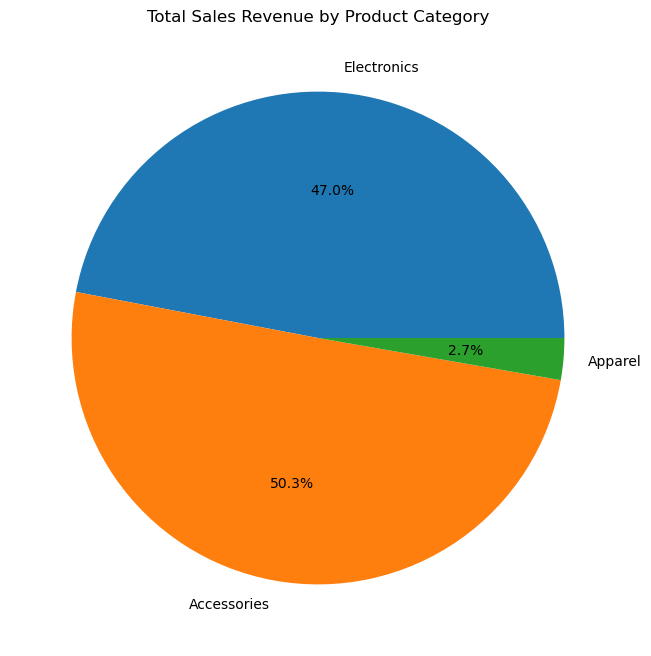

In [14]:
categories = ['Electronics', 'Accessories', 'Apparel']
total_revenue = [665000.0, 711000.0, 38680.0]

plt.figure(figsize=(8, 8))
plt.pie(total_revenue, labels=categories, autopct='%1.1f%%')
plt.title('Total Sales Revenue by Product Category')
plt.show()

In [15]:
#Which are the top 10 best-selling products? 

In [16]:
q = '''SELECT
  p.product_name,
  SUM(s.quantity) AS total_quantity_sold
FROM sales AS s
INNER JOIN products AS p
ON s.product_id = p.product_id
GROUP BY
   p.product_name
ORDER BY
   total_quantity_sold DESC
LIMIT 10'''
top_10_best_selling_product_by_qua = sql_query(q)
top_10_best_selling_product_by_qua

,product_name,total_quantity_sold
0,Shirt,349
1,Watch,330
2,Phone,319
3,Shoes,317
4,Jeans,317
5,Headphones,294
6,Laptop,286
7,Camera,272
8,Tablet,271
9,Bag,270


C:\Users\NLN\AppData\Local\Temp\ipykernel_4744\3760060375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='total_quantity_sold', data=top_10_best_selling_product_by_qua, palette='viridis')


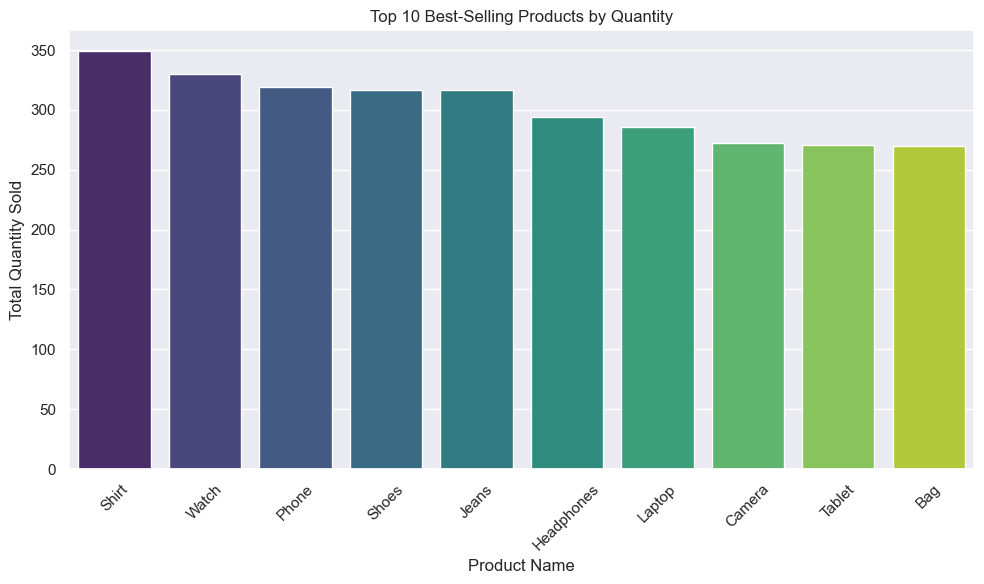

In [17]:
sns.set()
plt.figure(figsize=(10,6))
sns.barplot(x='product_name', y='total_quantity_sold', data=top_10_best_selling_product_by_qua, palette='viridis')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#What is the average sale quantity and average total sale value per customer city? 

In [19]:
q3 = '''
SELECT c.city, 
       AVG(s.quantity) AS avg_sale_quantity,
       AVG(s.quantity*p.price) AS avg_total_sale_value
FROM sales AS s
JOIN customers AS c ON s.customer_id = c.customer_id
JOIN products AS p ON s.product_id = p.product_id
GROUP BY c.city
'''
avg_sale_city = sql_query(q3)
avg_sale_city


,city,avg_sale_quantity,avg_total_sale_value
0,Adambury,1.000000,400.000000
1,Aguirremouth,3.000000,100.000000
2,Alexberg,2.000000,200.000000
3,Alisonberg,2.333333,603.333333
4,Allenborough,2.000000,160.000000
...,...,...,...
428,Williamsstad,2.000000,120.000000
429,Wilsonborough,3.666667,926.666667
430,Woodfort,2.333333,1360.000000
431,Wrightbury,2.500000,770.000000


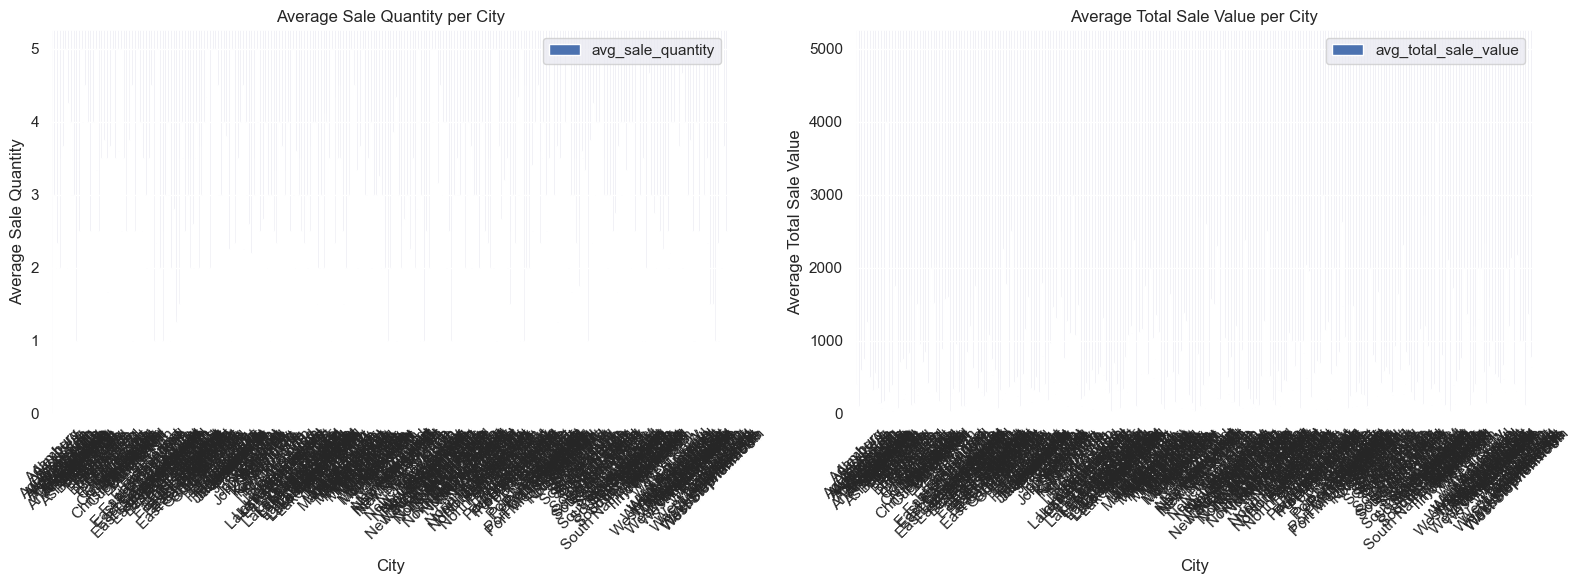

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

avg_sale_city.plot(kind='bar', x='city', y='avg_sale_quantity', ax=ax[0])
ax[0].set_title('Average Sale Quantity per City')
ax[0].set_xlabel('City')
ax[0].set_ylabel('Average Sale Quantity')
ax[0].tick_params(axis='x', rotation=45)

avg_sale_city.plot(kind='bar', x='city', y='avg_total_sale_value', ax=ax[1])
ax[1].set_title('Average Total Sale Value per City')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Average Total Sale Value')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [21]:
#How have total sales revenue and quantity sold trended over time (annually)? 

In [22]:
q4 = '''
SELECT STRFTIME('%Y', s.sale_date) AS year, 
       SUM(s.quantity * p.price) AS total_revenue,
       SUM(s.quantity) AS total_quantity_sold
FROM sales AS s
JOIN products AS p ON s.product_id = p.product_id
GROUP BY STRFTIME('%Y', s.sale_date)
'''
annual_sales = pd.read_sql_query(q4, conn)
conn.close()

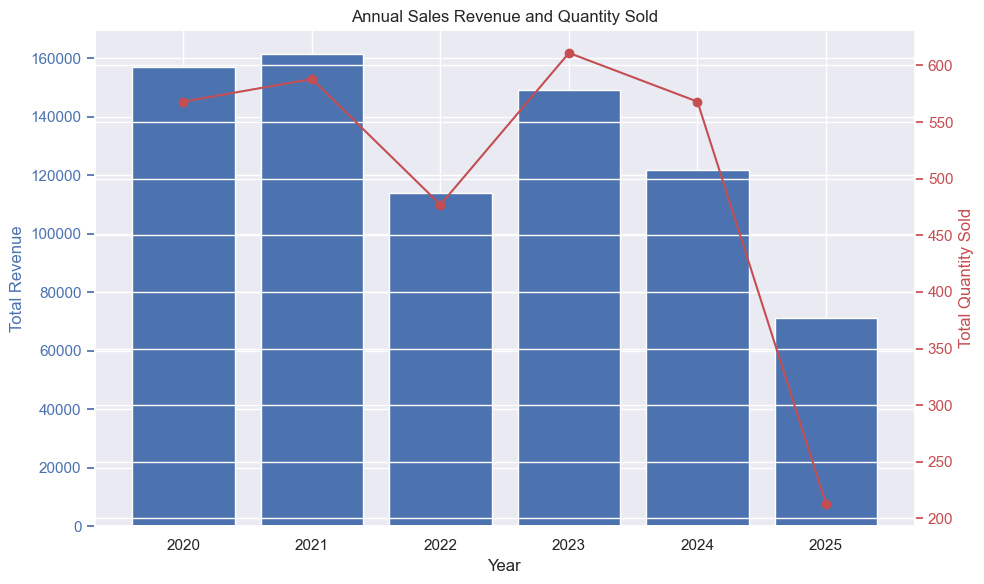

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(annual_sales['year'], annual_sales['total_revenue'], color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Revenue', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(annual_sales['year'], annual_sales['total_quantity_sold'], color='r', marker='o')
ax2.set_ylabel('Total Quantity Sold', color='r')
ax2.tick_params('y', colors='r')

plt.title('Annual Sales Revenue and Quantity Sold')
plt.tight_layout()
plt.show()


In [24]:
#Who are the top 10 customers by total revenue generated?

In [57]:
q5 = '''
SELECT
    c.customer_id,
    c.name AS customer_name,
    SUM(s.total_sale) AS total_revenue_generated
FROM sales AS s
INNER JOIN customers AS c
    ON s.customer_id = c.customer_id
GROUP BY c.customer_id, c.name
ORDER BY total_revenue_generated DESC
LIMIT 10;
'''

top_10_customers = pd.read_sql(q5, conn)
top_10_customers


,customer_id,customer_name,total_revenue_generated
0,290,Paula Kim,10700.0
1,339,Emily Fisher,9500.0
2,284,Maria Franco,9250.0
3,353,Brian Deleon,9020.0
4,60,Brian Cruz,8720.0
5,403,Amanda Moore,8650.0
6,325,Michelle Hull,8100.0
7,244,Paul Larson,7300.0
8,86,Michael Nielsen,7000.0
9,161,Allen Coleman,7000.0


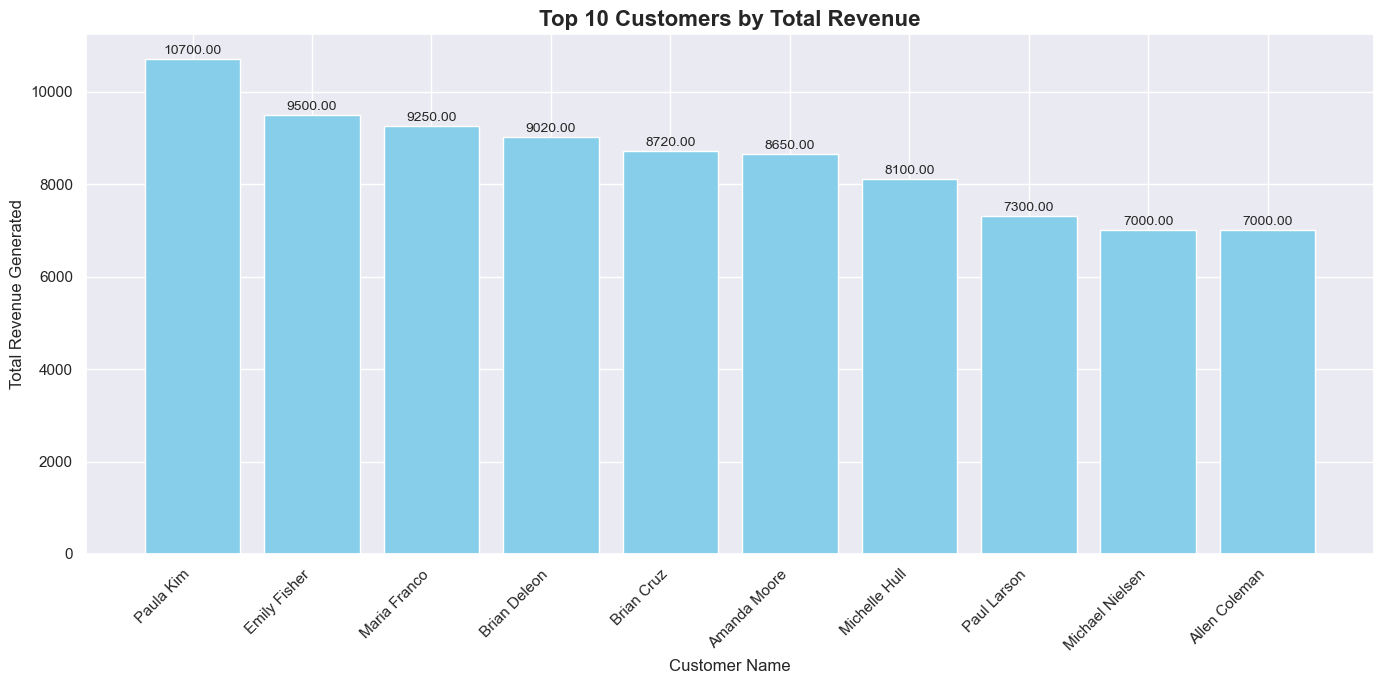

In [61]:
import matplotlib.pyplot as plt

# Extract data
customer_names = top_10_customers['customer_name']
revenues = top_10_customers['total_revenue_generated']

# Set figure size
plt.figure(figsize=(14,7))

# Create bar chart
plt.bar(customer_names, revenues, color='skyblue')

# Add labels and title
plt.xlabel("Customer Name", fontsize=12)
plt.ylabel("Total Revenue Generated", fontsize=12)
plt.title("Top 10 Customers by Total Revenue", fontsize=16, fontweight='bold')

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Annotate bars with revenue values
for i, v in enumerate(revenues):
    plt.text(i, v + max(revenues)*0.01, f"{v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
#What is the average price of products in each category?

In [71]:
q6 = '''
SELECT
    category,
    AVG(price) AS average_price
FROM products
GROUP BY category
ORDER BY 
average_price DESC;
'''

avg_price_by_category = pd.read_sql(q6, conn)
avg_price_by_category


,category,average_price
0,Electronics,460.0
1,Accessories,115.0
2,Apparel,40.0


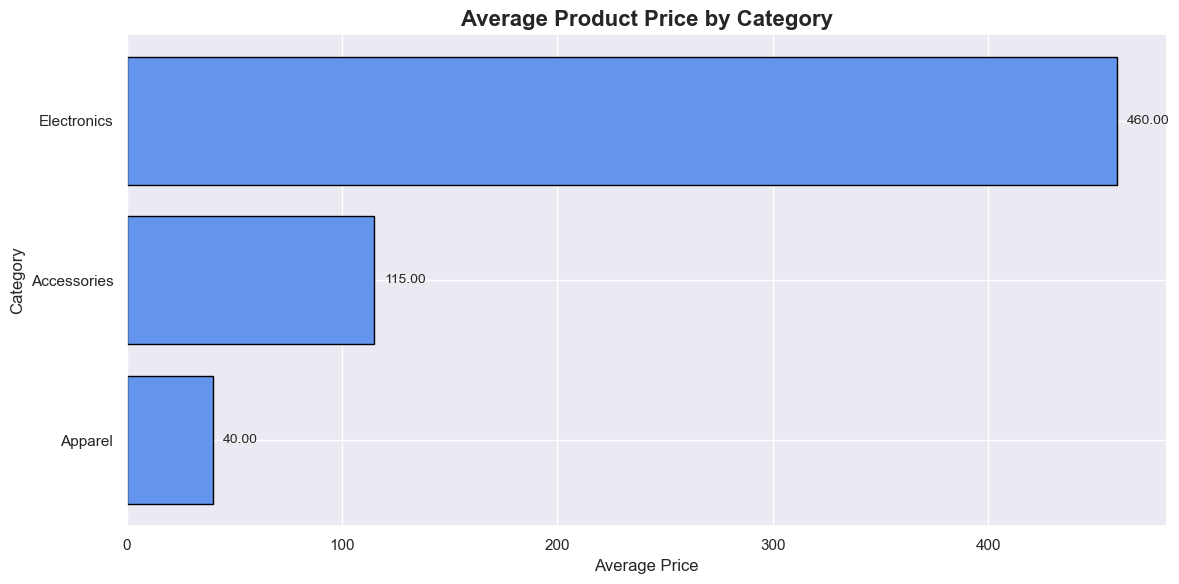

In [76]:
import matplotlib.pyplot as plt

# Data from your DataFrame
categories = avg_price_by_category['category']
avg_prices = avg_price_by_category['average_price']

# Create figure
plt.figure(figsize=(12,6))

# Horizontal bar chart
bars = plt.barh(categories, avg_prices, color='cornflowerblue', edgecolor='black')

# Labels and title
plt.xlabel("Average Price", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Average Product Price by Category", fontsize=16, fontweight='bold')

# Annotate bars with values
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(avg_prices)*0.01, bar.get_y() + bar.get_height()/2, f"{width:.2f}", va='center', fontsize=10)

# Invert y-axis so highest price appears on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
#What is the top-selling product (by revenue) within each product category?

In [95]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# List all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

# Example: check columns of one table (replace 'products' with any table name you want to inspect)
cursor.execute("PRAGMA table_info(products);")
columns = cursor.fetchall()
print("\nColumns in 'products' table:")
for col in columns:
    print(col)

# Close connection
conn.close()



Tables in the database: []

Columns in 'products' table:
